# Datos 

In [1]:
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

# Leyendo la data de entrenamiento.
train_df = pd.read_csv('df_train.csv')

# Leyendo la data de prueba.
test_df = pd.read_csv('df_test.csv')

# Leyendo la data RUL.
rul_df = pd.read_csv('df_rul.csv')

Using TensorFlow backend.


In [2]:
train_df.head()

,Unnamed: 0,data_id,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,0,FD001,1.0,1.0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,...,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191.0
1,1,FD001,1.0,2.0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,...,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190.0
2,2,FD001,1.0,3.0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,...,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189.0
3,3,FD001,1.0,4.0,0.0007,0.0000,100.0,518.67,642.35,1582.79,...,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188.0
4,4,FD001,1.0,5.0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,...,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187.0


In [3]:
test_df.head()

,Unnamed: 0,data_id,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,0,FD001,1.0,1.0,0.0023,0.0003,100.0,518.67,643.02,1585.29,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,1,FD001,1.0,2.0,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,2,FD001,1.0,3.0,0.0003,0.0001,100.0,518.67,642.46,1586.94,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,3,FD001,1.0,4.0,0.0042,0.0000,100.0,518.67,642.44,1584.12,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,4,FD001,1.0,5.0,0.0014,0.0000,100.0,518.67,642.51,1587.19,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130


In [4]:
rul_df.head()

,Unnamed: 0,data_id,RUL
0,0,FD001,112
1,1,FD001,98
2,2,FD001,69
3,3,FD001,82
4,4,FD001,91


In [5]:
train_df = train_df.drop('Unnamed: 0', axis = 1)
test_df = test_df.drop('Unnamed: 0', axis = 1)
rul_df = rul_df.drop('Unnamed: 0', axis = 1)

In [6]:
train_df.head()

,data_id,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,FD001,1.0,1.0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191.0
1,FD001,1.0,2.0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190.0
2,FD001,1.0,3.0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189.0
3,FD001,1.0,4.0,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188.0
4,FD001,1.0,5.0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187.0


In [7]:
test_df.head()

,data_id,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,FD001,1.0,1.0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,FD001,1.0,2.0,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,FD001,1.0,3.0,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,FD001,1.0,4.0,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,FD001,1.0,5.0,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130


In [8]:
rul_df.head()

,data_id,RUL
0,FD001,112
1,FD001,98
2,FD001,69
3,FD001,82
4,FD001,91


In [9]:
# Haciendo la normalización zscore a la data de entrenamiento.

cols_normalize = train_df.columns.difference(['data_id', 'unitNumber', 'cycle', 'rul'])

zscore_scaler = preprocessing.StandardScaler()

norm_train_df = pd.DataFrame(zscore_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)

# Juntando las columnas normalizadas con las no-normalizadas.

join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

In [10]:
train_df.head()

,data_id,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,FD001,1.0,1.0,-1.041429,-1.115418,0.345955,1.079185,1.046626,1.037990,1.024534,...,0.345200,0.616065,-0.845217,0.963589,1.009022,0.801655,0.345955,1.121962,1.119494,191.0
1,FD001,1.0,2.0,-1.041272,-1.115146,0.345955,1.079185,1.054395,1.055929,1.043169,...,0.345649,0.527629,-0.828851,0.963589,1.009022,0.801655,0.345955,1.116830,1.120150,190.0
2,FD001,1.0,3.0,-1.041647,-1.113516,0.345955,1.079185,1.059103,1.023520,1.050946,...,0.345289,0.549211,-0.847479,0.963589,0.944550,0.801655,0.345955,1.112553,1.108831,189.0
3,FD001,1.0,4.0,-1.041344,-1.114331,0.345955,1.079185,1.059103,0.979517,1.033851,...,0.345739,0.556653,-0.913473,0.963589,1.009022,0.801655,0.345955,1.106566,1.113065,188.0
4,FD001,1.0,5.0,-1.041502,-1.114874,0.345955,1.079185,1.059574,0.980025,1.065766,...,0.345379,0.556281,-0.832044,0.963589,1.041258,0.801655,0.345955,1.108277,1.117413,187.0


# Seleccionando el archivo 1

In [11]:
train_df_fd001 = train_df[train_df['data_id'] == 'FD001']
train_df_fd001 = train_df_fd001.drop('data_id', axis = 1)

test_df_fd001 = test_df[test_df['data_id'] == 'FD001']
test_df_fd001 = test_df_fd001.drop('data_id', axis = 1)

rul_df_fd001 = rul_df[rul_df['data_id'] == 'FD001']
rul_df_fd001 = rul_df_fd001.drop('data_id', axis = 1)

In [12]:
"""# Haciendo la normalización del RUL... MinMax normalization (de 0 a 1)

rul_norm = preprocessing.MinMaxScaler().fit_transform(train_df_fd001_1['rul'].values.reshape(-1,1))
rul_norm_df = pd.DataFrame(rul_norm)
train_df_fd001_1['rul_norm'] = rul_norm_df"""

"# Haciendo la normalización del RUL... MinMax normalization (de 0 a 1)\n\nrul_norm = preprocessing.MinMaxScaler().fit_transform(train_df_fd001_1['rul'].values.reshape(-1,1))\nrul_norm_df = pd.DataFrame(rul_norm)\ntrain_df_fd001_1['rul_norm'] = rul_norm_df"

In [13]:
train_df_fd001.head()

,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,1.0,1.0,-1.041429,-1.115418,0.345955,1.079185,1.046626,1.037990,1.024534,1.107714,...,0.345200,0.616065,-0.845217,0.963589,1.009022,0.801655,0.345955,1.121962,1.119494,191.0
1,1.0,2.0,-1.041272,-1.115146,0.345955,1.079185,1.054395,1.055929,1.043169,1.107714,...,0.345649,0.527629,-0.828851,0.963589,1.009022,0.801655,0.345955,1.116830,1.120150,190.0
2,1.0,3.0,-1.041647,-1.113516,0.345955,1.079185,1.059103,1.023520,1.050946,1.107714,...,0.345289,0.549211,-0.847479,0.963589,0.944550,0.801655,0.345955,1.112553,1.108831,189.0
3,1.0,4.0,-1.041344,-1.114331,0.345955,1.079185,1.059103,0.979517,1.033851,1.107714,...,0.345739,0.556653,-0.913473,0.963589,1.009022,0.801655,0.345955,1.106566,1.113065,188.0
4,1.0,5.0,-1.041502,-1.114874,0.345955,1.079185,1.059574,0.980025,1.065766,1.107714,...,0.345379,0.556281,-0.832044,0.963589,1.041258,0.801655,0.345955,1.108277,1.117413,187.0


In [14]:
test_df_fd001.head()

,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,1.0,1.0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,1.0,2.0,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,1.0,3.0,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,1.0,4.0,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,1.0,5.0,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130


In [15]:
# Normalización zscore a la data de prueba.

norm_test_df = pd.DataFrame(zscore_scaler.fit_transform(test_df_fd001[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df_fd001.index)

test_join_df = test_df_fd001[test_df_fd001.columns.difference(cols_normalize)].join(norm_test_df)
test_df_fd001 = test_join_df.reindex(columns = test_df_fd001.columns)
test_df_fd001 = test_df_fd001.reset_index(drop=True)
test_df_fd001.head()

,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,1.0,1.0,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866
1,1.0,2.0,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,...,0.736727,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042
2,1.0,3.0,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,...,0.397202,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247
3,1.0,4.0,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244
4,1.0,5.0,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,...,0.718857,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450


In [16]:
"""train_df_fd001_1 = train_df_fd001_1.loc[:, train_df_fd001_1.std() > 0.00001]
test_df_fd001 = test_df_fd001.loc[:, test_df_fd001.std()>0.00001]"""

'train_df_fd001_1 = train_df_fd001_1.loc[:, train_df_fd001_1.std() > 0.00001]\ntest_df_fd001 = test_df_fd001.loc[:, test_df_fd001.std()>0.00001]'

In [17]:
train_df_fd001.head()

,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,1.0,1.0,-1.041429,-1.115418,0.345955,1.079185,1.046626,1.037990,1.024534,1.107714,...,0.345200,0.616065,-0.845217,0.963589,1.009022,0.801655,0.345955,1.121962,1.119494,191.0
1,1.0,2.0,-1.041272,-1.115146,0.345955,1.079185,1.054395,1.055929,1.043169,1.107714,...,0.345649,0.527629,-0.828851,0.963589,1.009022,0.801655,0.345955,1.116830,1.120150,190.0
2,1.0,3.0,-1.041647,-1.113516,0.345955,1.079185,1.059103,1.023520,1.050946,1.107714,...,0.345289,0.549211,-0.847479,0.963589,0.944550,0.801655,0.345955,1.112553,1.108831,189.0
3,1.0,4.0,-1.041344,-1.114331,0.345955,1.079185,1.059103,0.979517,1.033851,1.107714,...,0.345739,0.556653,-0.913473,0.963589,1.009022,0.801655,0.345955,1.106566,1.113065,188.0
4,1.0,5.0,-1.041502,-1.114874,0.345955,1.079185,1.059574,0.980025,1.065766,1.107714,...,0.345379,0.556281,-0.832044,0.963589,1.041258,0.801655,0.345955,1.108277,1.117413,187.0


In [18]:
rul = pd.DataFrame(test_df_fd001.groupby('unitNumber')['cycle'].max()).reset_index()
rul.columns = ['unitNumber', 'max']
rul_df_fd001.columns = ['more']

rul_df_fd001['unitNumber'] = rul_df_fd001.index + 1
rul_df_fd001['max'] = rul['max'] + rul_df_fd001['more']
rul_df_fd001.drop('more', axis=1, inplace=True)

# generate RUL for test data
test_df_fd001 = test_df_fd001.merge(rul_df_fd001, on=['unitNumber'], how='left')
test_df_fd001['rul'] = test_df_fd001['max'] - test_df_fd001['cycle']
test_df_fd001.drop('max', axis=1, inplace=True)

In [19]:
rul_df_fd001.head()

,unitNumber,max
0,1,143.0
1,2,147.0
2,3,195.0
3,4,188.0
4,5,189.0


In [20]:
test_df_fd001.head()

,unitNumber,cycle,operatingSet1,operatingSet2,operatingSet3,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,...,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul
0,1.0,1.0,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,...,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866,142.0
1,1.0,2.0,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,...,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042,141.0
2,1.0,3.0,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,...,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247,140.0
3,1.0,4.0,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,...,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244,139.0
4,1.0,5.0,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,...,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450,138.0


# Ventana de operación

In [21]:
# Se seleccionará una ventana de 50 ciclos.
ventana = 50

# Ajuste de datos para la entrada de las LSTM

In [22]:
# Función de ajuste de los datos de entrada (samples, time steps, features) 
def gen_sequence(id_df, ventana, features):

    # Para una misma unitNumber se colocan los valores de los sensores en una matriz simple (vector).
    
    data_matriz = id_df[features].values
    num_elementos = data_matriz.shape[0]
    
    # Por ejemplo, para el id 1 se tienen 192 filas y la ventana es igual a 50
    # por lo que se va a iterar en una lista que que incluya la ventana de la siguiente manera:
    
    # 0 - 50 -> de la row 0 a row 50
    # 1 - 51 -> de la row 1 a row 51
    # 2 - 52 -> de la row 2 a row 52
    # ...
    # 141 - 191 -> from row 141 to 191
    
    for start, stop in zip(range(0, num_elementos-ventana), range(ventana, num_elementos)):
        yield data_matriz[start:stop, :]  

In [23]:
# Se toman los features o atributos.

sensor_cols = ['sensorMeasure' + str(i) for i in range(1,22)]
sequence_cols = ['operatingSet1', 'operatingSet2', 'operatingSet3']
sequence_cols.extend(sensor_cols)

# val es una lista para validar que incluye (192 - 50 = 142) arreglo bi-dimensional (50 rows x 25 columns)
val=list(gen_sequence(train_df_fd001[train_df_fd001['unitNumber']==1], ventana, sequence_cols))
print(len(val))

# generador para la secuencia
seq_gen = (list(gen_sequence(train_df_fd001[train_df_fd001['unitNumber']== id], ventana, sequence_cols))
           for id in train_df_fd001['unitNumber'].unique())

# genero la secuencia y lo convierto en un array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

142


(15631, 50, 24)

In [24]:
# Función para generar los RUL
def gen_labels(id_df, ventana, label):
    
    # Para un unitNumber determinado, se colocan los valores de RUL dentro de una matriz simple (vector).
    
    # Por ejemplo:
    # [[1]
    # [2]
    # [3]
    # [4]
    # [5]
    # ...
    # [200]] 
    
    data_matriz = id_df[label].values
    num_elementos = data_matriz.shape[0]

    return data_matriz[ventana:num_elementos, :]

# Obtengo los RUL finales por ventana
label_gen = [gen_labels(train_df_fd001[train_df_fd001['unitNumber']==id], ventana, ['rul']) 
             for id in train_df_fd001['unitNumber'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

In [25]:
label_array

array([[141.],
       [140.],
       [139.],
       ...,
       [  2.],
       [  1.],
       [  0.]], dtype=float32)

# Construcción de la Red Neuronal

Crearé una función que me permite evaluar el **coeficiente de determinación**

In [26]:
def r2_keras(y_true, y_pred):
    """Coeficiente de determinación
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

**Ahora construiremos la red neuronal.**
* La primera capa seran neuronas LSTM con 100 unidades seguidas de otra capa LSTM con 50 unidades.
* Se empleará el *Dropout* luego de cada capa para controlar el **overfitting.**
* La última capa será una capa *Dense* de salida con una sola unidad donde se empleará la función de activación lineal debido a que es un problema de **regresión**.

<img src="http://oi65.tinypic.com/2zgd728.jpg">

In [27]:
numero_features = seq_array.shape[2]
salida = label_array.shape[1]

model = Sequential()

#Primera capa
model.add(LSTM(input_shape=(ventana, numero_features), units=100, return_sequences=True))
model.add(Dropout(0.2))

#Segunda capa
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

#Última capa
model.add(Dense(units=salida))
model.add(Activation("linear"))

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae', r2_keras])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 100)           50000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 80,251
Trainable params: 80,251
Non-trainable params: 0
_________________________________________________________________
None


# Ajustando la Red Neuronal

In [28]:
model_path = 'regression_model.h5'

history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Train on 14849 samples, validate on 782 samples
Epoch 1/100
 - 20s - loss: 8739.6549 - mean_absolute_error: 74.7643 - r2_keras: -1.6979e+00 - val_loss: 8173.9144 - val_mean_absolute_error: 71.9645 - val_r2_keras: -2.4621e+00
Epoch 2/100
 - 17s - loss: 8080.9753 - mean_absolute_error: 70.9295 - r2_keras: -1.4918e+00 - val_loss: 7648.8306 - val_mean_absolute_error: 68.9145 - val_r2_keras: -2.2127e+00
Epoch 3/100
 - 16s - loss: 7567.6608 - mean_absolute_error: 67.9721 - r2_keras: -1.3314e+00 - val_loss: 7155.4677 - val_mean_absolute_error: 66.0667 - val_r2_keras: -1.9803e+00
Epoch 4/100
 - 17s - loss: 7089.5696 - mean_absolute_error: 65.2308 - r2_keras: -1.1813e+00 - val_loss: 6692.6165 - val_mean_absolute_error: 63.4132 - val_r2_keras: -1.7641e+00
Epoch 5/100
 - 16s - loss: 6638.0872 - mean_absolute_error: 62.6632 - r2_keras: -1.0418e+00 - val_loss: 6258.5797 - val_mean_absolute_error: 60.9432 - val_r2_keras: -1.5635e+00
Epoch 6/100
 - 16s - loss: 6216.6178 - mean_absolute_error: 60.3223

Epoch 48/100
 - 16s - loss: 2016.2066 - mean_absolute_error: 32.6076 - r2_keras: 0.3845 - val_loss: 2333.8931 - val_mean_absolute_error: 33.9515 - val_r2_keras: 0.1703
Epoch 49/100
 - 16s - loss: 1783.9818 - mean_absolute_error: 29.6794 - r2_keras: 0.4561 - val_loss: 3697.8073 - val_mean_absolute_error: 50.9292 - val_r2_keras: -9.2194e-01
Epoch 50/100
 - 16s - loss: 1852.5485 - mean_absolute_error: 30.9838 - r2_keras: 0.4288 - val_loss: 1529.0842 - val_mean_absolute_error: 30.6268 - val_r2_keras: 0.2892
Epoch 51/100
 - 15s - loss: 1625.9605 - mean_absolute_error: 28.3862 - r2_keras: 0.5017 - val_loss: 1275.4491 - val_mean_absolute_error: 25.9538 - val_r2_keras: 0.4937
Epoch 52/100
 - 15s - loss: 1564.0097 - mean_absolute_error: 27.5631 - r2_keras: 0.5178 - val_loss: 1865.8208 - val_mean_absolute_error: 33.6763 - val_r2_keras: 0.0134
Epoch 53/100
 - 15s - loss: 1461.5795 - mean_absolute_error: 26.4116 - r2_keras: 0.5511 - val_loss: 1594.3132 - val_mean_absolute_error: 26.9913 - val_r2_k

# Graficos

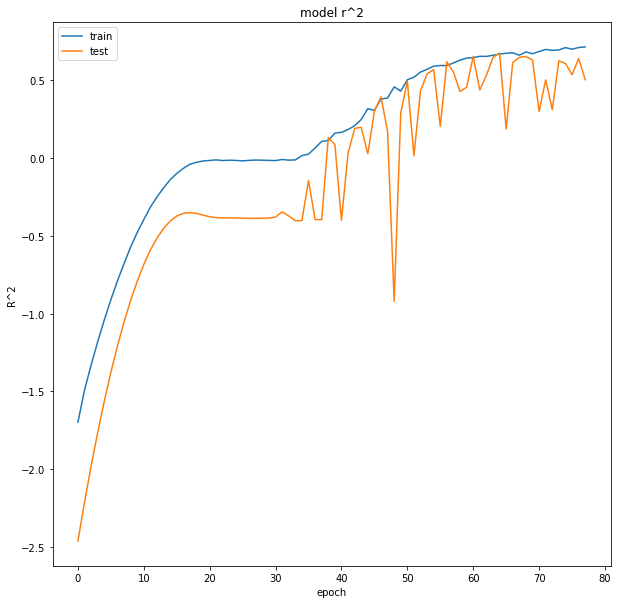

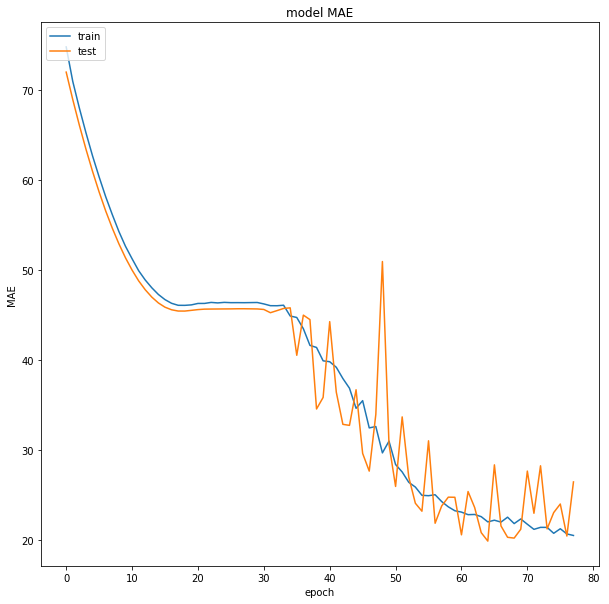

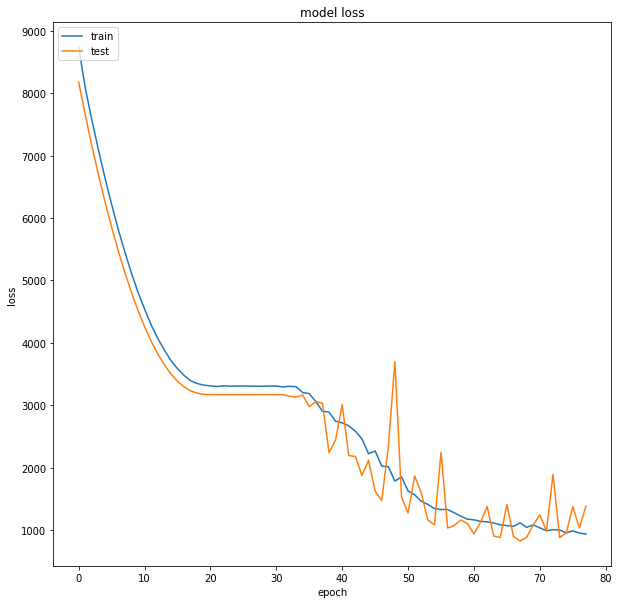

15631/15631 [==============================] - 5s 336us/step

MAE: 27.841218844339263

R^2: 0.4584059968088343
15631/15631 [==============================] - 6s 356us/step


In [29]:
# Historial para el R^2
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title('model r^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_r2.png")

# Historial para el MAE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_mae.png")

# Historial para el Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_regression_loss.png")

# Metricas de entrenamiento
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nR^2: {}'.format(scores[2]))

y_pred = model.predict(seq_array, verbose=1, batch_size=200)
y_real = label_array

test_set = pd.DataFrame(y_pred)

In [30]:
test_set.head()

,0
0,147.227661
1,144.325531
2,144.697983
3,146.785049
4,147.349060


# Probando la Red Neuronal con los datos de prueba.

seq_array_test_last
(93, 50, 24)
label_array_test_last
(93, 1)
[[ 69.]
 [ 82.]
 [ 91.]
 [ 93.]
 [ 91.]
 [ 95.]
 [111.]
 [ 96.]
 [ 97.]
 [124.]
 [ 95.]
 [ 83.]
 [ 84.]
 [ 50.]
 [ 28.]
 [ 87.]
 [ 16.]
 [ 57.]
 [113.]
 [ 20.]
 [119.]
 [ 66.]
 [ 97.]
 [ 90.]
 [115.]
 [  8.]
 [ 48.]
 [106.]
 [  7.]
 [ 11.]
 [ 19.]
 [ 21.]
 [ 50.]
 [ 28.]
 [ 18.]
 [ 10.]
 [ 59.]
 [109.]
 [114.]
 [ 47.]
 [135.]
 [ 92.]
 [ 21.]
 [ 79.]
 [114.]
 [ 29.]
 [ 26.]
 [ 97.]
 [137.]
 [ 15.]
 [103.]
 [ 37.]
 [114.]
 [100.]
 [ 21.]
 [ 54.]
 [ 72.]
 [ 28.]
 [128.]
 [ 14.]
 [ 77.]
 [  8.]
 [121.]
 [ 94.]
 [118.]
 [ 50.]
 [131.]
 [126.]
 [113.]
 [ 10.]
 [ 34.]
 [107.]
 [ 63.]
 [ 90.]
 [  8.]
 [  9.]
 [137.]
 [ 58.]
 [ 89.]
 [116.]
 [115.]
 [136.]
 [ 28.]
 [ 38.]
 [ 20.]
 [ 85.]
 [ 55.]
 [128.]
 [137.]
 [ 82.]
 [ 59.]
 [117.]
 [ 20.]]

MAE: 52.885254029304754

R^2: -1.677165449306529


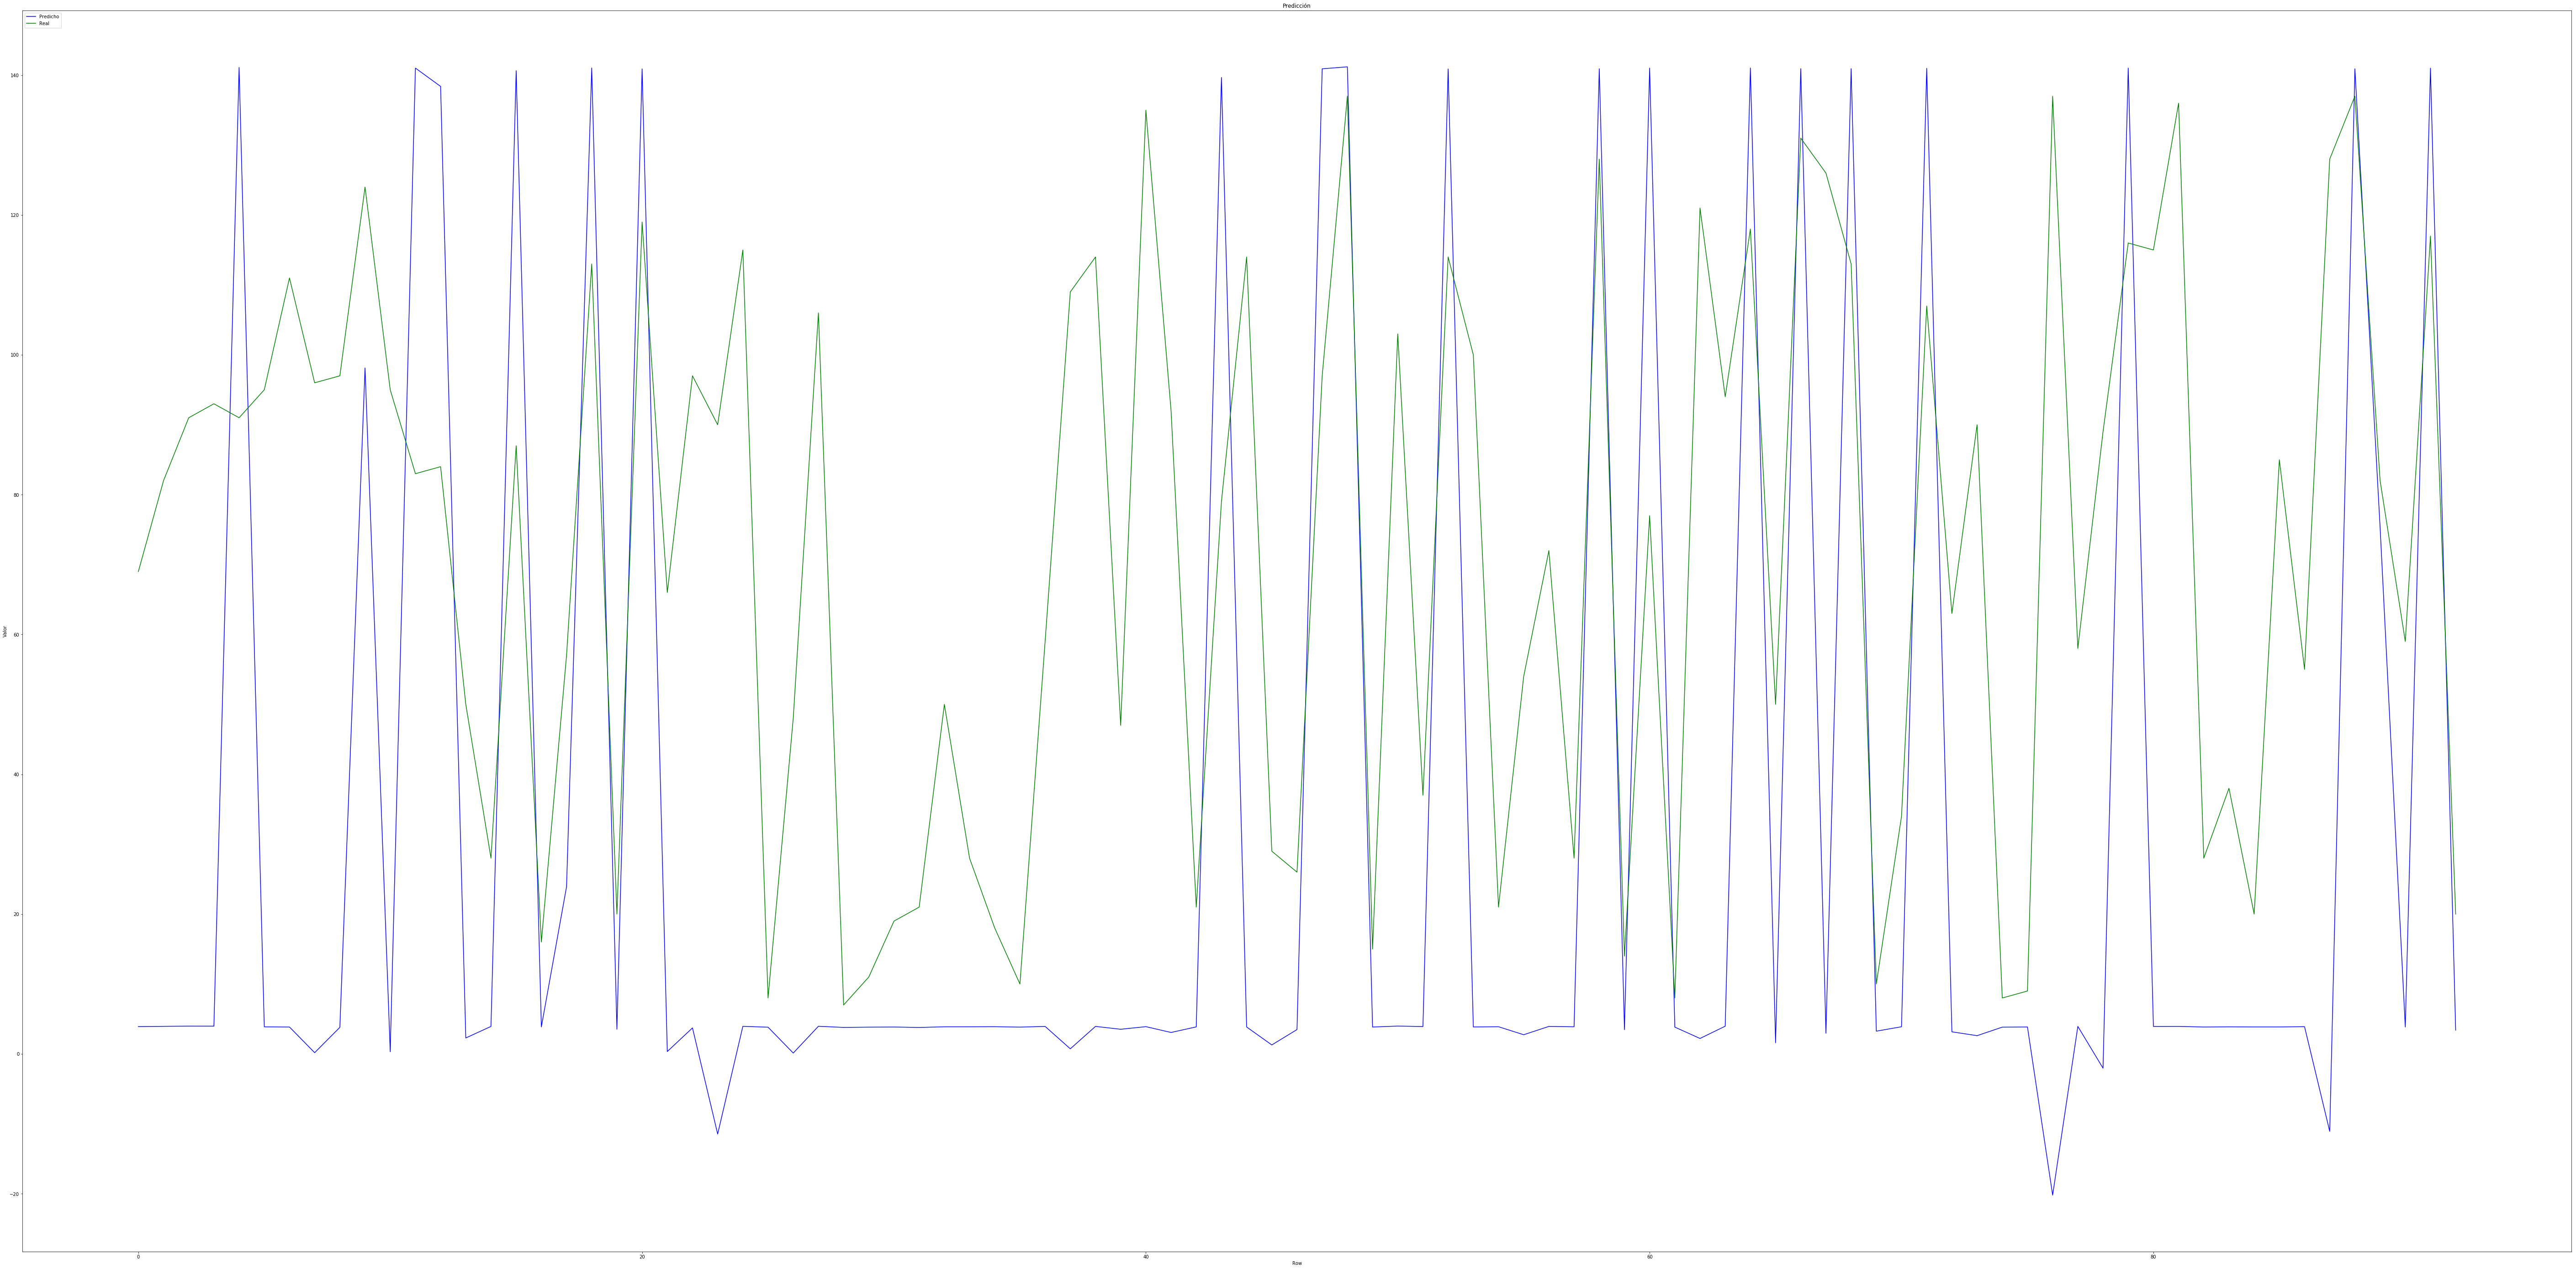

In [31]:
# Se seleccionará la ultima ventana para cada máquina de los datos de prueba.

seq_array_test_last = [test_df_fd001[test_df_fd001['unitNumber']==id][sequence_cols].values[-ventana:] 
                       for id in test_df_fd001['unitNumber'].unique() if 
                       len(test_df_fd001[test_df_fd001['unitNumber']==id]) >= ventana]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

print("seq_array_test_last")
print(seq_array_test_last.shape)

# De manera similar tomaremos los RUL

y_mask = [len(test_df_fd001[test_df_fd001['unitNumber']==id]) >= ventana for id in test_df_fd001['unitNumber'].unique()]
label_array_test_last = test_df_fd001.groupby('unitNumber')['rul'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

print("label_array_test_last")
print(label_array_test_last.shape)
print(label_array_test_last)

# Se carga el mejor modelo de iteración y se usa.
if os.path.isfile(model_path):
    estimator = load_model(model_path, custom_objects={'r2_keras': r2_keras})

    # metricas de prueba
    scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
    print('\nMAE: {}'.format(scores_test[1]))
    print('\nR^2: {}'.format(scores_test[2]))

    y_pred_test = estimator.predict(seq_array_test_last)
    y_true_test = label_array_test_last

    test_set = pd.DataFrame(y_pred_test)

    # Se grafica en color azul los datos predichos y en color verde
    # los dastos reales para verficiar la exactitud del modelo.
    
    fig_verify = plt.figure(figsize=(100, 50))
    plt.plot(y_pred_test, color="blue")
    plt.plot(y_true_test, color="green")
    plt.title('Predicción')
    plt.ylabel('Valor')
    plt.xlabel('Row')
    plt.legend(['Predicho', 'Real'], loc='upper left')
    plt.show()
    fig_verify.savefig("model_regression_verify.png")